In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

from osgeo import gdal

In [2]:
# Opens the HDF file
def load_data(FILEPATH: str) -> gdal.Dataset:
    ds = gdal.Open(FILEPATH)
    return ds


def fetch_subset(granule_id: str, i: int = 8, channel: int = 1) -> np.ndarray:
    filepath = os.path.join("..", "..", "dataset", granule_id)
    ds = load_data(filepath)
    # print(ds.GetSubDatasets()[i])
    # grid5km:cosSZA features only
    raster = gdal.Open(ds.GetSubDatasets()[i][0])
    band = raster.GetRasterBand(channel)
    band_arr = band.ReadAsArray()
    return band_arr


In [3]:
filepath = os.path.join("..", "..", "dataset",
                        '20200604T070000_maiac_dl_0.hdf')
ds = load_data(filepath)

print(len(ds.GetSubDatasets()))

for i in range(len(ds.GetSubDatasets())):
    print(ds.GetSubDatasets()[i])


13
('HDF4_EOS:EOS_GRID:"../../dataset/20200604T070000_maiac_dl_0.hdf":grid1km:Optical_Depth_047', '[3x1200x1200] Optical_Depth_047 grid1km (16-bit integer)')
('HDF4_EOS:EOS_GRID:"../../dataset/20200604T070000_maiac_dl_0.hdf":grid1km:Optical_Depth_055', '[3x1200x1200] Optical_Depth_055 grid1km (16-bit integer)')
('HDF4_EOS:EOS_GRID:"../../dataset/20200604T070000_maiac_dl_0.hdf":grid1km:AOD_Uncertainty', '[3x1200x1200] AOD_Uncertainty grid1km (16-bit integer)')
('HDF4_EOS:EOS_GRID:"../../dataset/20200604T070000_maiac_dl_0.hdf":grid1km:FineModeFraction', '[3x1200x1200] FineModeFraction grid1km (16-bit integer)')
('HDF4_EOS:EOS_GRID:"../../dataset/20200604T070000_maiac_dl_0.hdf":grid1km:Column_WV', '[3x1200x1200] Column_WV grid1km (16-bit integer)')
('HDF4_EOS:EOS_GRID:"../../dataset/20200604T070000_maiac_dl_0.hdf":grid1km:AOD_QA', '[3x1200x1200] AOD_QA grid1km (16-bit unsigned integer)')
('HDF4_EOS:EOS_GRID:"../../dataset/20200604T070000_maiac_dl_0.hdf":grid1km:AOD_MODEL', '[3x1200x1200] 

# MAIAC Features

> Hierarchical Data Format (HDF) is a set of file formats (HDF4, HDF5) designed 
> to store and organize large amounts of data

https://lpdaac.usgs.gov/products/mcd19a2v006/

> Aerosol Optical Depths (AOD)

Tiny solid and liquid particles suspended in the atmosphere are called aerosols. Windblown dust, sea salts, volcanic ash, smoke from wildfires, and pollution from factories are all examples of aerosols. Depending upon their size, type, and location, aerosols can either cool the surface, or warm it. They can help clouds to form, or they can inhibit cloud formation. And if inhaled, some aerosols can be harmful to people's health.

The MCD19A2 AOD data product contains the following 13 Science Dataset (SDS) layers: 
1. blue band AOD at 0.47 µm, (aerosol optical depth)
2. green band AOD at 0.55 µm,

The AOD is originally retrieved (and reported) in MODIS Blue band B3 (0.47µm). Because the common input for the chemical transport models and GCMs as well as AOD validation and AOD product intercomparison are standardized to 0.55µm, we also provide the “Green” band (B4) AOD. It is computed from 0.47µm based on spectral properties of regional aerosol model used in retrievals. Validation shows that quality of AOD at 0.55µm is generally close though slightly worse than the original retrieval at 0.47 µm.

3. AOD uncertainty, 

This parameter is evaluated based on the Blue-band B3 surface brightness (reflectance) only, and thus gives only a general indication of possible increase of error over brighter surfaces;

4. fine mode fraction over water, 

reported along with AOD over open ocean and large inland lakes (like Great Lakes of North America). It is not retrieved over small in-land water bodies.

5. column water vapor over land and clouds (in cm), 

CWV is reported for both clear and cloudy pixels. In the latter case, it represents water vapor above the cloud.

6. AOD QA, 

quality assurance (QA) filters
In daily output files, the QA bit contains cloud mask, adjacency mask, surface type (the result of
MAIAC dynamic Land-Water-Snow classification), and a surface change mask.

7. AOD model at 1km, 

AOT model used in retrieval

8. smoke injection height (m above ground), 

Reported near detected fire hot spots when smoke plume is optically thick and exhibits brightness temperature contrast with unobscured neighbor land surface

9. cosine of solar zenith angle, 
10. cosine of view zenith angle, 
11. relative azimuth angle, 
12. scattering angle, and 
13. glint angle at 5km. 

9-13 are all View Geometry over land and water at 5km.


A low-resolution browse image is also included showing AOD of the blue band at 0.47 µm created using a composite of all available orbits.


Each SDS layer within each MCD19A2 Hierarchical Data Format 4 (HDF4) file contains a third dimension that represents 'the number of orbit overpasses'. This factor could affect the total number of bands for each SDS layer.


The MCD19 SDS layers are three dimensional. The total number of bands in each file is contingent upon the number of orbit overpasses (1-2 at the equator and up to 30 in Polar Regions). For example, a file with an orbit number of five will contain five bands for each SDS layer (i.e. FineModeFraction will be recorded in 5 separate instances). Note that at high latitudes, only the first 16 orbits with the largest coverage are selected for processing per day in order to limit the file size. i.e. may not be 3

Orbit information is stored in the Orbit_amount and Orbit_time_stamp attributes in the HDF file. The global metadata attributes of MODIS data products can be viewed in software such as HDFView and Panoply.

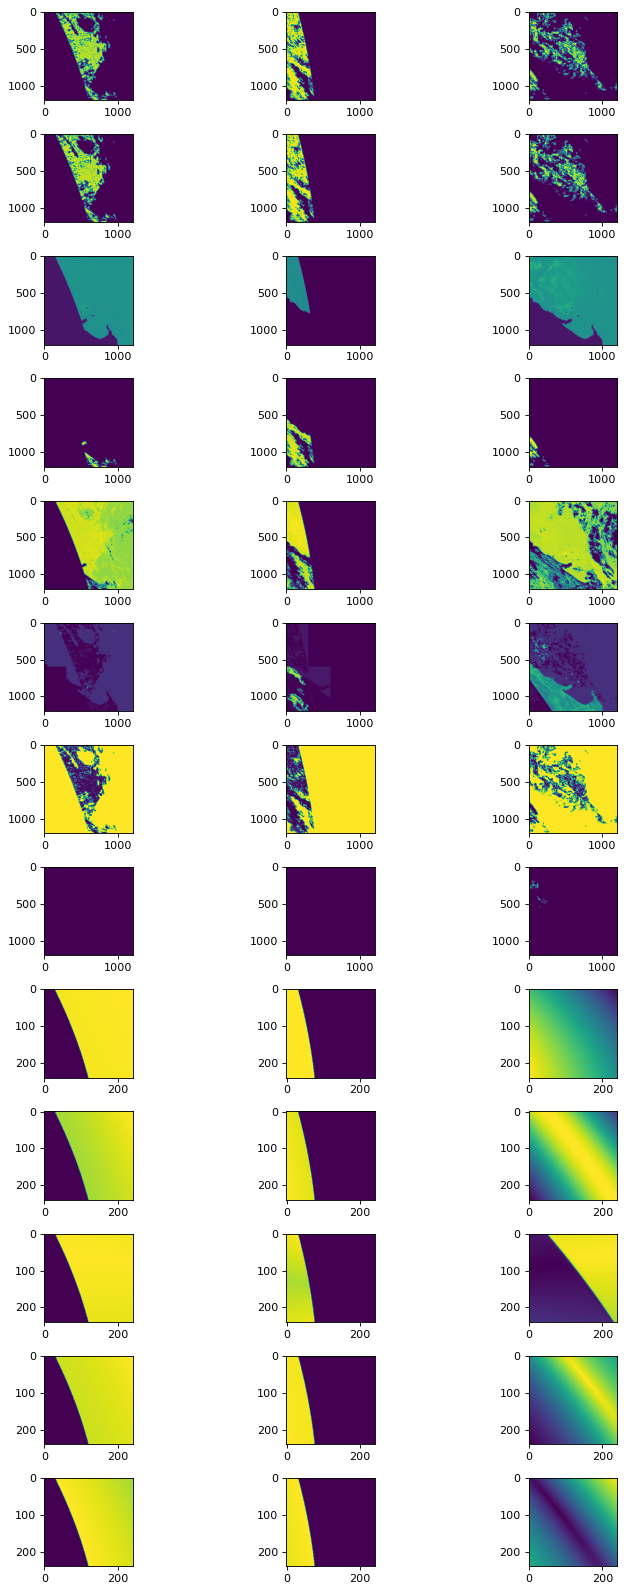

In [4]:

g_id = '20200604T070000_maiac_dl_0.hdf'
fig = plt.figure(figsize=(10, 20), dpi=80)

for i in range(13):
    for c in range(1, 4):
        plt.subplot(13, 3, i * 3 + c)
        plt.tight_layout()
        arr = fetch_subset(g_id, i, c)
        plt.imshow(arr)


# MISR Features

Multi-angle Imaging SpectroRadiometer (MISR) is one instrument that provides remote sensing data for multi-angle observation. It is carried on the Terra satellite and consists of 4 bands and 9 Charge Coupled Device (CCD) cameras, which can provide continuous ground coverage at nine angles. MISR can obtain multi-angle observations at the same location within 7 minutes, which greatly improves the accuracy of retrieval information (Diner et al., 1991; Prasad and Singh, 2007).


In [4]:
misr_path = os.path.join("..", "..", "dataset",
                        '20180203T193400_misr_la_0.nc')
ds = load_data(misr_path)

print(len(ds.GetSubDatasets()))

for i in range(len(ds.GetSubDatasets())):
    print(ds.GetSubDatasets()[i])

69
('NETCDF:"../../dataset/20180203T193400_misr_la_0.nc":/4.4_KM_PRODUCTS/Latitude', '[4000x504] latitude (32-bit floating-point)')
('NETCDF:"../../dataset/20180203T193400_misr_la_0.nc":/4.4_KM_PRODUCTS/Longitude', '[4000x504] longitude (32-bit floating-point)')
('NETCDF:"../../dataset/20180203T193400_misr_la_0.nc":/4.4_KM_PRODUCTS/Elevation', '[4000x504] surface_height_above_reference_ellipsoid) (16-bit integer)')
('NETCDF:"../../dataset/20180203T193400_misr_la_0.nc":/4.4_KM_PRODUCTS/Year', '[4000x504] /4.4_KM_PRODUCTS/Year (16-bit unsigned integer)')
('NETCDF:"../../dataset/20180203T193400_misr_la_0.nc":/4.4_KM_PRODUCTS/Day_Of_Year', '[4000x504] /4.4_KM_PRODUCTS/Day_Of_Year (16-bit unsigned integer)')
('NETCDF:"../../dataset/20180203T193400_misr_la_0.nc":/4.4_KM_PRODUCTS/Month', '[4000x504] /4.4_KM_PRODUCTS/Month (8-bit unsigned integer)')
('NETCDF:"../../dataset/20180203T193400_misr_la_0.nc":/4.4_KM_PRODUCTS/Day', '[4000x504] /4.4_KM_PRODUCTS/Day (8-bit unsigned integer)')
('NETCDF:

Warning 1: dimension #1 (Y_Dim) is not a Longitude/X dimension.
Warning 1: dimension #0 (X_Dim) is not a Latitude/Y dimension.


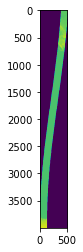

In [8]:
misr_id = '20180203T193400_misr_la_0.nc'
arr = fetch_subset(misr_id, 2, 1)
plt.imshow(arr)

# fig = plt.figure(figsize=(10, 20), dpi=80)

# for i in range(69):
#     for c in range(1, 4):
#         plt.subplot(13, 5, i * 3 + c)
#         plt.tight_layout()
#         arr = fetch_subset(misr_id, i, c)
#         plt.imshow(arr)